# Joining Yelp Data to Original Dataset, Payday loans

#### Import dependencies

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Read in CSVs

In [174]:
csv1 = pd.read_csv('joinable_kc_dataset.csv')
csv2 = pd.read_csv('yelp_predatory.csv')

In [175]:
joinable_raw_data = pd.DataFrame(csv1)
predatory = pd.DataFrame(csv2)

#### View the datasets

In [176]:
joinable_raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999"
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999"
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999"
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393"
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999"


In [177]:
predatory.head()

,lat+long_group,Number of Predatory Lenders
0,"47.51670803571437,-122.2529999999999",0
1,"47.71654017857156,-122.3089999999999",0
2,"47.73874375000014,-122.2249999999999",0
3,"47.51670803571437,-122.393",0
4,"47.61662410714297,-122.0569999999999",0


#### Join datasets

In [178]:
df = pd.merge(joinable_raw_data, predatory, on='lat+long_group')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,Number of Predatory Lenders
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
1,1895000260,20140721T000000,207950,2,2.00,890,5000,1.0,0,0,...,0,98118,47.5158,-122.264,1860,5000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
2,1895000045,20150504T000000,195000,2,1.00,820,5100,1.0,0,0,...,0,98118,47.5156,-122.262,1170,5304,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
3,770000045,20141024T000000,405600,5,1.50,2830,4000,2.5,0,0,...,0,98118,47.5132,-122.262,1480,4000,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0
4,8073000550,20150415T000000,1700000,4,3.75,3190,17186,2.0,1,4,...,0,98178,47.5115,-122.246,2290,13496,47.516708,-122.253,"47.51670803571437,-122.2529999999999",0


#### Drop rows with no data

In [179]:
len(df)

21436

In [180]:
df2 = df.dropna()

In [181]:
len(df2)

21436

In [182]:
df2['price'].mean()

540623.6140138085

#### Plot

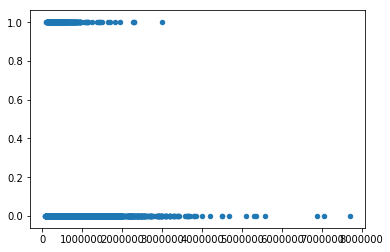

In [191]:
#plt.figure(figsize=(20,10))
plt.scatter(df2['price'], df2['Number of Predatory Lenders'], s=20)
#plt.xlim(0,1250000)
plt.show()

In [192]:
df3 = df2[df2['Number of Predatory Lenders'] > 0]
df4 = df2[df2['Number of Predatory Lenders'] == 0]

In [227]:
print(df3['price'].mean())
print(df3['price'].std())
print(len(df3))

428099.7720207254
305766.3526690369
579


In [228]:
print(df4['price'].mean())
print(df4['price'].std())
print(len(df4))

543747.3280912883
369018.26081617543
20857


#### Linear Regression

In [221]:
fig, ax = plt.subplots()
fit = np.polyfit(df2['price'], df2['Number of Predatory Lenders'], deg=1)
ax.plot(df2['price'], fit[0] * df2['price'] + fit[1], color='red')
ax.scatter(df2['price'], df2['Number of Predatory Lenders'], s=1)



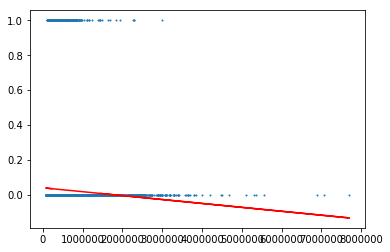

In [222]:
plt.show()

#### Pearson's Correlation

In [223]:
df2['price'].corr(df2['Number of Predatory Lenders'])

-0.050957590679519729

Correlation is very weak

In [224]:
x = np.arange(0,21436,1)
x

array([    0,     1,     2, ..., 21433, 21434, 21435])

In [225]:
corrs = []
for a in x:
    b = df2['price'].head(a).corr(df2['Number of Predatory Lenders'].head(a))
    corrs.append(b)
    

/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


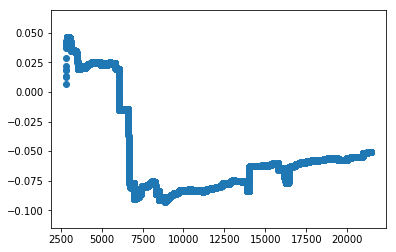

In [226]:
plt.scatter(x,corrs)
#plt.xlim(0,2000)
plt.show()